## t-Distributed Stochastic Neighbor Embedding (t-SNE)
`learning_rate` of t-SNE is between **10** to **1000**. High values lead to more wild outcome, whereas low values leads to more conservative results.

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import seaborn as sns
import os
from pathlib               import Path
from sklearn.preprocessing import normalize
from sklearn.manifold      import TSNE

In [2]:
plt.style.use('ggplot')

In [6]:
# set root directory
path_root = Path("C:/Users/giann/data-science-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

- Root directory = C:\Users\giann\data-science-core


### Stock movements
cluster companies via their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day) from `2010` to `2015` obtained from *Yahoo! Finance*, where each row corresponds to a company, and each column corresponds to a trading day. Some stocks are more expensive than others. To account for this, include a `Normalizer` at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

In [16]:
path_dataset = path_root / 'dataset/company-stock-movements-2010-2015-incl.csv'
data      = pd.read_csv(path_dataset, index_col = 0) 
movements = data.values
companies = data.index
data.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


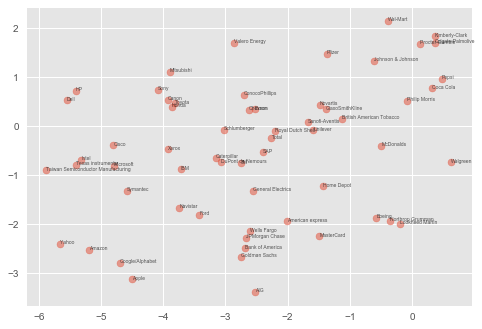

In [17]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)
# Create a t-SNE instance: model (no interprable meaning)
model = TSNE(learning_rate = 50) # generally between 50
# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)
# Select the 0th feature: xs
xs = tsne_features[:,0]
# Select the 1th feature: ys
ys = tsne_features[:,1]
plt.figure()
plt.scatter(xs, ys, alpha=0.5)
# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
#plt.savefig('plot\\CompanyClusters.jpg', quality = 100, dpi = 600)
plt.show()

### Grains
- **A**: area; 
- **P**: perimeter; 
- $C = \frac{4 \pi A}{P^{2}}$ : compactness; 
- **L1**: length of kernel; 
- **W**:  width of kernel, 
- **AC**: asymmetry coefficient 
- **L2**: length of kernel groove. 
- **y** : grain category

In [18]:
path_dataset = path_root / 'dataset/grains/seeds.csv'
grains = pd.read_csv(path_dataset, 
                     header = None,
                     names  = ['A', 'P', 'C', 'L1', 'W', 'AC', 'L2', 'y'])
X    = grains.drop('y', axis=1).values
y    = grains['y'].values
grains.head()

,A,P,C,L1,W,AC,L2,y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


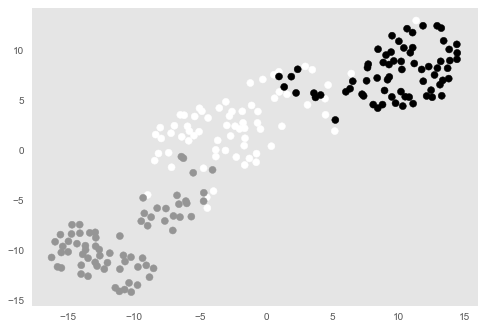

In [20]:
#%% visualize with t-SNE 
# Create a TSNE instance: model
model = TSNE(learning_rate = 200)
# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)
# Select the 0th feature: xs
xs = tsne_features[:,0]
# Select the 1st feature: ys
ys = tsne_features[:,1]
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c = y)
plt.grid()
plt.show()

### t-SNE on ANSUR female dataset
Use categorical features to detect patterns.

In [16]:
# import dataset
path_dataset = path_root / 'dataset/ANSUR_II_FEMALE.csv'
data  = pd.read_csv(path_dataset)
data.shape

(1986, 99)

In [12]:
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Component', 'Gender', 'BMI_class', 'Height_class']
# Drop the non-numerical columns from df
df_numeric = data.drop(non_numeric, axis=1)

In [13]:
# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)
# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features)

[[  2.592262   -22.652914  ]
 [ 29.026005    27.64777   ]
 [ 10.520279    31.884706  ]
 ...
 [-30.545523    11.426579  ]
 [ -2.1397789  -21.884941  ]
 [ 12.908394    -0.87420505]]


In [19]:
# combine tsne feature with categorical variables
df_tsne = pd.DataFrame(data = tsne_features, columns = ['x', 'y'])
df_tsne = pd.concat([df_tsne, data[non_numeric]], axis = 1)

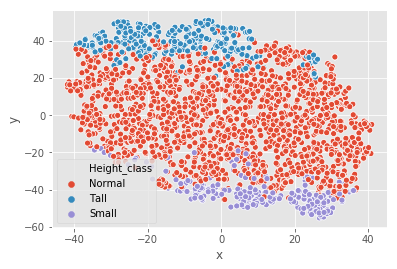

In [24]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Height_class', data = df_tsne)
# Show the plot
plt.show()

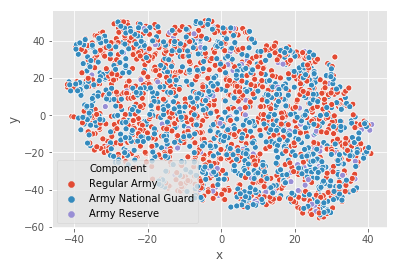

In [28]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue= 'Component', data = df_tsne)
# Show the plot
plt.show()

`Height_class` appears clustered, hence it is heligible to be use as categorical variable 